# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | mogok
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | rosarito
Processing Record 6 of Set 1 | slave lake
Processing Record 7 of Set 1 | uray
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | sumberpucung
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | weno
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | makokou
Processing Record 20 of Set 1 | delmas
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | grytviken
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.74,55,100,1.79,AU,1723101330
1,mogok,22.9167,96.5000,21.24,90,75,2.57,MM,1723101331
2,cockburn town,21.4612,-71.1419,27.67,87,79,8.37,TC,1723101332
3,touros,-5.1989,-35.4608,22.56,84,7,4.91,BR,1723100737
4,rosarito,32.3333,-117.0333,20.53,84,17,1.25,MX,1723101255


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.74,55,100,1.79,AU,1723101330
1,mogok,22.9167,96.5000,21.24,90,75,2.57,MM,1723101331
2,cockburn town,21.4612,-71.1419,27.67,87,79,8.37,TC,1723101332
3,touros,-5.1989,-35.4608,22.56,84,7,4.91,BR,1723100737
4,rosarito,32.3333,-117.0333,20.53,84,17,1.25,MX,1723101255


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

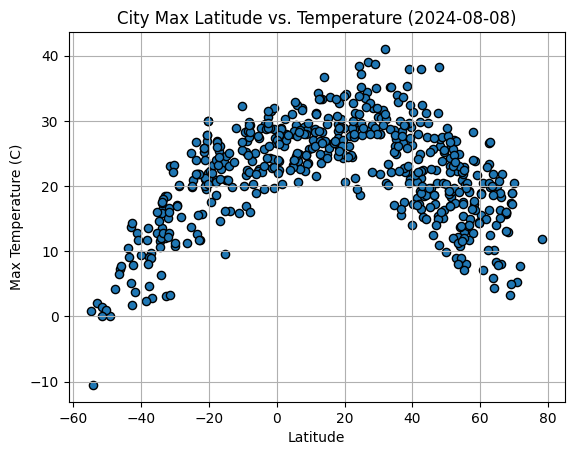

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
date = city_data_df["Date"].apply(lambda x: time.strftime("%Y-%m-%d", time.localtime(x))).to_list()[0]
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

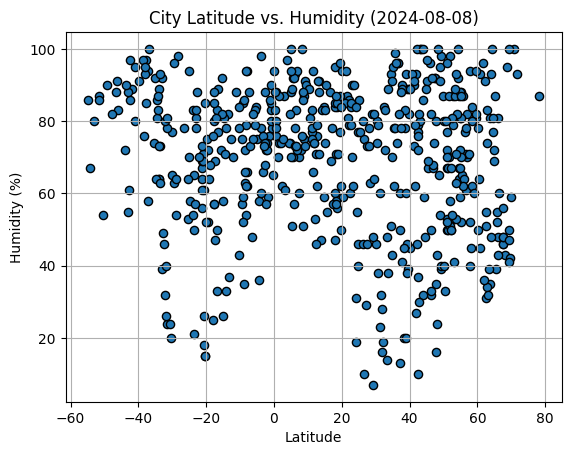

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

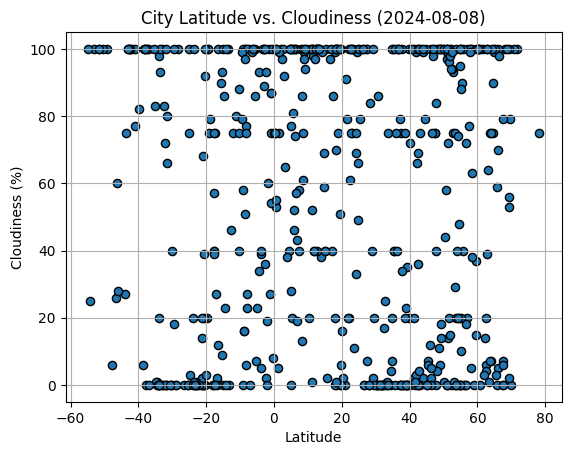

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

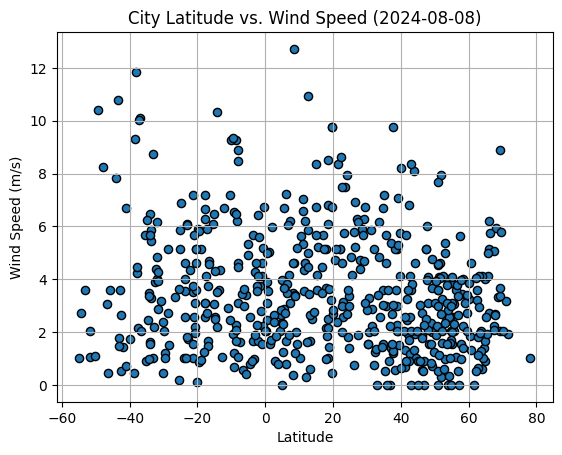

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_scatter(x, y, xlabel="x", ylabel="y"):
    (slope, intercept, rvalue, _, _) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r^2 value is {rvalue}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, color="red")
    equation_text = f'y = {slope:.2f}x + {intercept:.1f}'
    plt.text(x=x.min(), y=y.max(), s=equation_text, fontsize=10, color='red', verticalalignment='top')
    plt.title(f"{xlabel} vs {ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mogok,22.9167,96.5000,21.24,90,75,2.57,MM,1723101331
2,cockburn town,21.4612,-71.1419,27.67,87,79,8.37,TC,1723101332
4,rosarito,32.3333,-117.0333,20.53,84,17,1.25,MX,1723101255
5,slave lake,55.2834,-114.7690,12.99,88,0,2.57,CA,1723101336
6,uray,60.1247,64.7758,15.50,50,100,3.26,RU,1723101337


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.74,55,100,1.79,AU,1723101330
3,touros,-5.1989,-35.4608,22.56,84,7,4.91,BR,1723100737
8,invercargill,-46.4000,168.3500,7.23,91,60,0.45,NZ,1723101339
9,sumberpucung,-8.1586,112.4829,29.79,54,77,4.61,ID,1723101340
15,east london,-33.0153,27.9116,18.52,39,0,1.03,ZA,1723101347


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is -0.6106719608810651


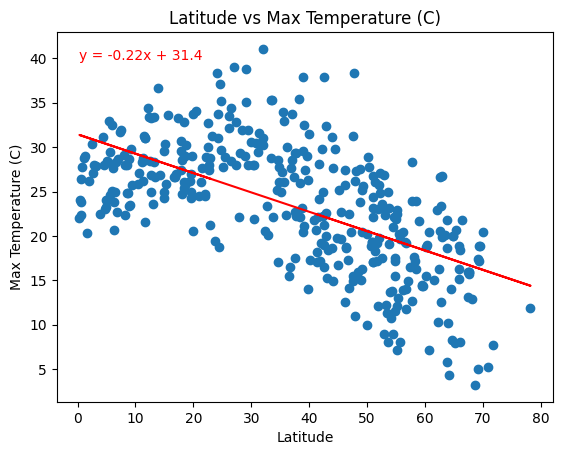

In [15]:
# Linear regression on Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

The r^2 value is 0.8256450668186694


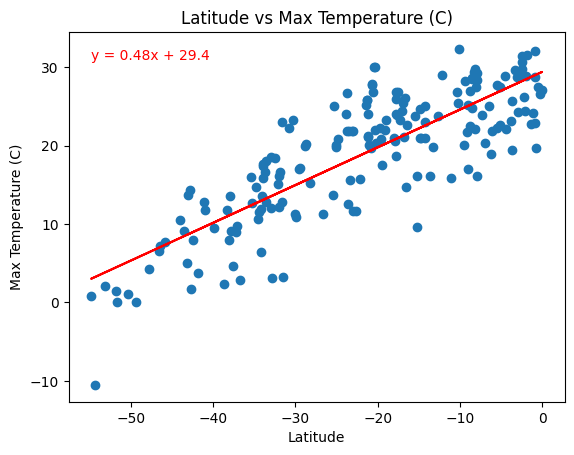

In [16]:
# Linear regression on Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The coef of regression r^2  -0.5595764464778396 indicates a negative relationship between latitude and temperature in North hemisphere.
y= -0.2x+30.3 means that for any increase of the latitude, the Northern hemisphere temperature decrease by 0.2. The opposite is true for the Southern hemisphere. 
R^2=0.8026697458365207; reveals a strong positive correlation from latitude to temperature in this region. 
Y=0.43x+27.6; For 1 unit increase of Latitude, there is a rise of 0.43x the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is -0.16734986188901493


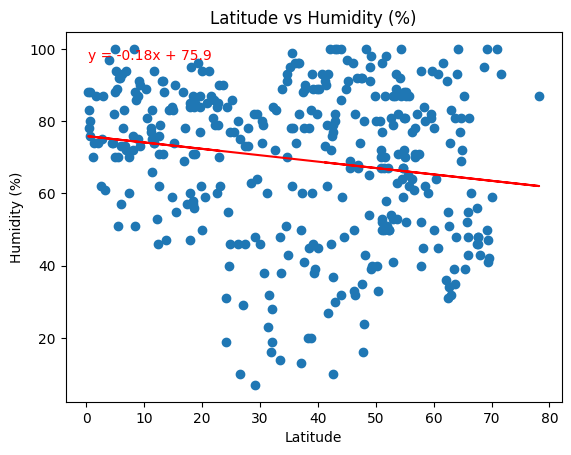

In [17]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

The r^2 value is -0.11202274097285594


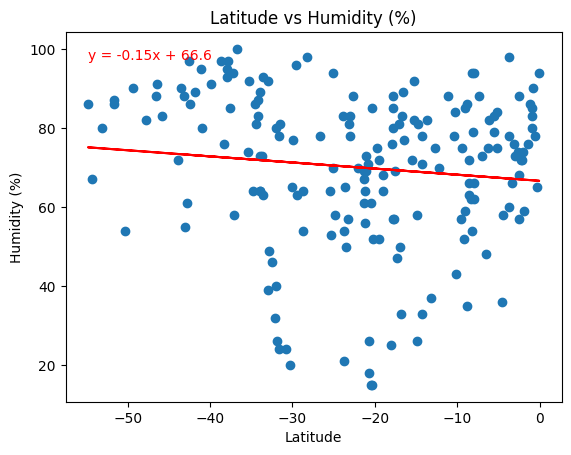

In [18]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The coef of regression r^2  -0.11565118317571847 indicates a weak negative correlation between latitude and humidity in North hemisphere.
y= -0.13x+76.6 means that for 1 unit increase of the latitude, the Northern hemisphere humidity decrease by 0.13 

r^2= 0.07258339122305602; strong positive correlation 
Y=0.11x+70.6; For 1 unit increase of Latitude, there is a rise of 0.11x the humidity in Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is -0.14135633215400994


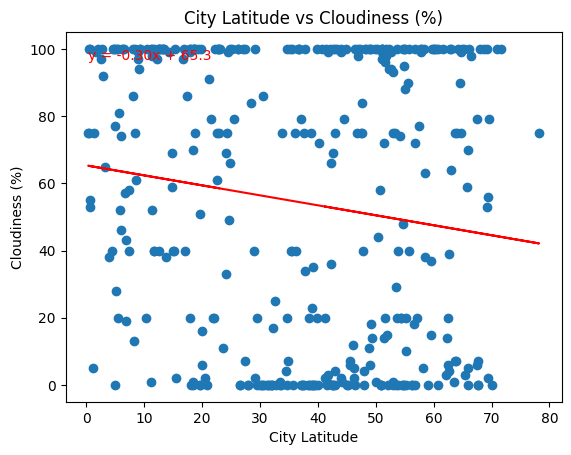

In [19]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

The r^2 value is -0.008583293493265231


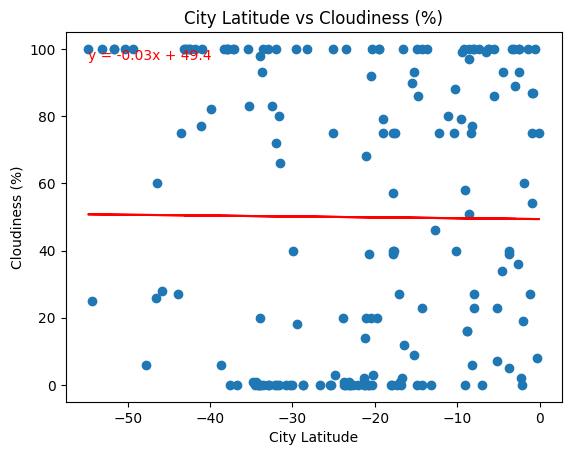

In [20]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The coef of regression r^2  -0.11565118317571847 indicates a weak negative correlation between latitude and cloudiness in North hemisphere.
y= -0.18x + 57.8 means that for 1 unit increase of the latitude, the Northern hemisphere cloudiness decrease by 0.18 

r^2 value is -0.22256272350254727; negative correlation 
Y= -0.66x + 39.5; For 1 unit increase of Latitude, there is a decrease of -0.66x in Southern hemisphere cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is -0.1997172442537563


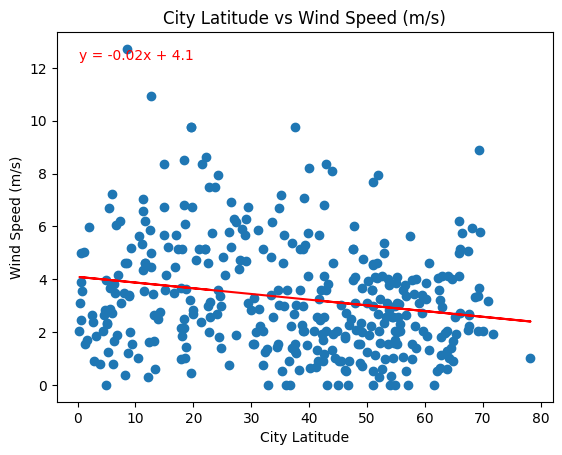

In [21]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

The r^2 value is -0.009424015737337522


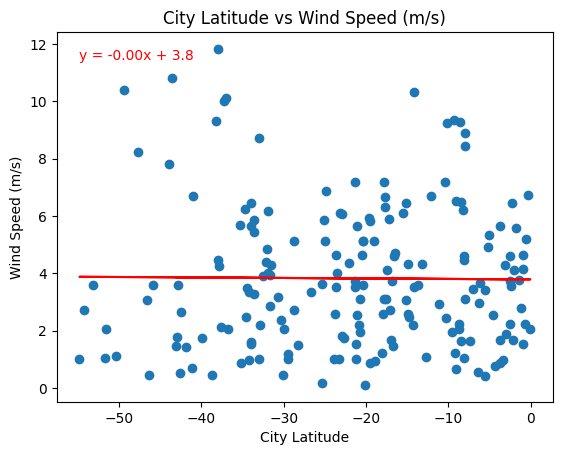

In [22]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between wind and Latitude in Nothern region is insignificant; r^2 value is -0.009862881011026309. No variation is observable in wind speed when the city changes.

For the South hemisphere, r^2 value is -0.03706481549577091; there is a 0.01 variation in wind speed as the city latitude changes in unit. 
